# 🛍️ Mall Customer Segmentation using K-Means Clustering

### 📌 Project Overview:
In this project, we apply **K-Means Clustering** to the **Mall Customers dataset** to identify distinct groups of customers based on their demographics and spending behavior.  
This type of unsupervised learning helps businesses segment customers for targeted marketing strategies and improved customer understanding.

### ✅ Objectives:
- Load and preprocess the dataset.
- Scale features for clustering.
- Use the **Elbow Method** to find the optimal number of clusters (K).
- Apply **K-Means Clustering** to segment customers.
- Visualize clusters using **PCA (2D projection)**.
- Evaluate clustering quality using the **Silhouette Score**.



### 1: Import Required Libraries

We import libraries for data analysis, clustering, preprocessing, and evaluation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set_style("whitegrid")


### 2: Load and Inspect Dataset

We load the dataset and preview the first few rows to understand its structure.

In [29]:
# Load Mall Customers dataset
df = pd.read_csv("data/Mall_Customers.csv")

# Display top rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3: Data Preprocessing

Drop unnecessary columns and encode the 'Gender' column to numeric for K-Means.

In [30]:
# Drop CustomerID as it’s not needed
df.drop("CustomerID", axis=1, inplace=True)

# Encode Gender: Female = 0, Male = 1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### 4: Feature Scaling

Scale features since K-Means is distance-based and sensitive to feature magnitudes.

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


### 5: Elbow Method to Find Optimal K

The Elbow Method helps identify the optimal number of clusters (K) by observing the point where inertia drops sharply.

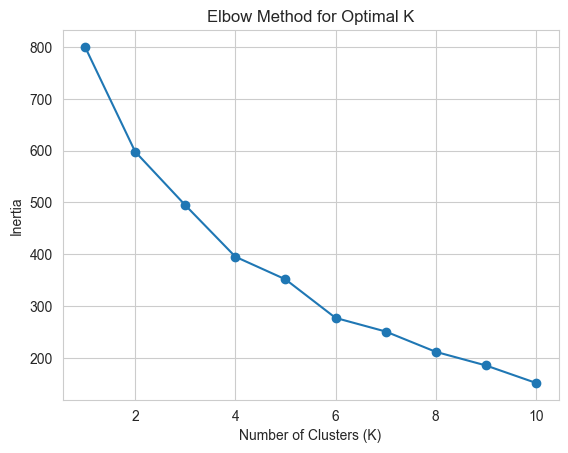

In [32]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


### 6: Apply K-Means Clustering

We apply K-Means with the chosen K and assign cluster labels to each customer.

In [33]:
# From Elbow Method, assume K=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to dataset
df['Cluster'] = clusters

# Check cluster assignments
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


### 7: Visualize Clusters (2D Projection with PCA)

Use PCA to reduce dimensionality to 2D for easy visualization of clusters.

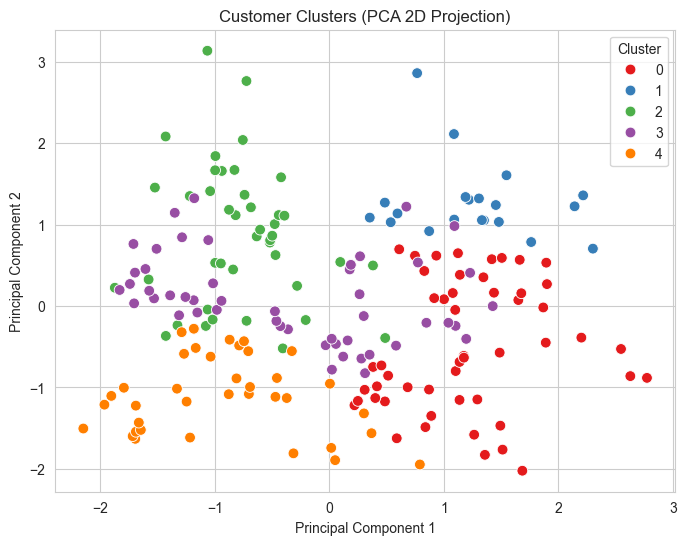

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set1', s=60)
plt.title("Customer Clusters (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### 8: Evaluate Clustering with Silhouette Score

Silhouette Score measures how well samples are clustered (ranges from -1 to 1, higher is better).

In [35]:
score = silhouette_score(scaled_features, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.27191023466188324


## ✅ Conclusion

- K-Means clustering successfully grouped customers into distinct segments.
- The Elbow Method helped determine the optimal number of clusters (K).
- PCA visualization provided clear separation among clusters.
- The Silhouette Score confirmed that the clustering was meaningful.
- This clustering can help businesses target customer groups more effectively based on spending behavior.
